<a href="https://colab.research.google.com/github/XinchengLi0306/INFOSYS-722-Assignment-5-Iteration-4-BDAS/blob/master/Iteration_4_BDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFOSYS 722 Assignment 5-Iteration-4-BDAS**

## **Step 1 Business Understanding**


### 1.1 Business Situation


### 1.2 Assessment of the Situation

### 1.3 Data Mining Objectives

### 1.4 Project Plan

## Step 2 Data Understanding

In [1]:
# Import the drive module from google.colab
from google.colab import drive
# Mount Google Drive to the specified directory in Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch # Import the torch library
# Check if a CUDA enabled GPU is available, otherwise use the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device # Display the device being used

device(type='cpu')

In [3]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("PySparkInColab").getOrCreate()

# Display the SparkSession object
spark

### 2.1 Collecting Initial Data

In [4]:
# Initialize Spark Session
spark = SparkSession.builder.appName("ISIC2019_DataUnderstanding").getOrCreate()

# Load the ISIC 2019 dataset/Define the path to the CSV file
csv_file_path = "/content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Data/ISIC_2019_Training_GroundTruth.csv"

# Read the CSV file into a Spark DataFrame
# InferSchema is set to true to automatically detect the schema
# Header is set to true as the file contains a header row
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Get descriptive statistics for the DataFrame
print("Descriptive Statistics:")
df.describe().show()

Descriptive Statistics:
+-------+------------+------------------+-------------------+------------------+--------------------+------------------+--------------------+--------------------+-------------------+-----+
|summary|       image|               MEL|                 NV|               BCC|                  AK|               BKL|                  DF|                VASC|                SCC|  UNK|
+-------+------------+------------------+-------------------+------------------+--------------------+------------------+--------------------+--------------------+-------------------+-----+
|  count|       25331|             25331|              25331|             25331|               25331|             25331|               25331|               25331|              25331|25331|
|   mean|        NULL|0.1785164423038964| 0.5082704985985551|0.1311831352887766|0.034226836682326005|0.1035884884134065|0.009435079546800363|0.009987762030713354|0.02479175713552564|  0.0|
| stddev|        NULL|0.3829544

### 2.2 Describing Data

#### 2.2.1 Format of the data

In [5]:
# Display the first few rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
df.show(5)


First 5 rows of the DataFrame:
+------------+---+---+---+---+---+---+----+---+---+
|       image|MEL| NV|BCC| AK|BKL| DF|VASC|SCC|UNK|
+------------+---+---+---+---+---+---+----+---+---+
|ISIC_0000000|  0|  1|  0|  0|  0|  0|   0|  0|  0|
|ISIC_0000001|  0|  1|  0|  0|  0|  0|   0|  0|  0|
|ISIC_0000002|  1|  0|  0|  0|  0|  0|   0|  0|  0|
|ISIC_0000003|  0|  1|  0|  0|  0|  0|   0|  0|  0|
|ISIC_0000004|  1|  0|  0|  0|  0|  0|   0|  0|  0|
+------------+---+---+---+---+---+---+----+---+---+
only showing top 5 rows



#### 2.2.2 Quantity of the data

In [6]:
# Get the number of rows in the DataFrame
row_count = df.count()

# Get the number of columns in the DataFrame
col_count = len(df.columns)

# Display the number of rows and columns
print(f"Quantity of the data (number of rows): {row_count}")
print(f"Number of columns: {col_count}")

Quantity of the data (number of rows): 25331
Number of columns: 10


#### 2.2.3 Fields of the data

In [7]:
# Display the schema to see the fields and their types
print("DataFrame Schema (Fields):")
df.printSchema()

DataFrame Schema (Fields):
root
 |-- image: string (nullable = true)
 |-- MEL: integer (nullable = true)
 |-- NV: integer (nullable = true)
 |-- BCC: integer (nullable = true)
 |-- AK: integer (nullable = true)
 |-- BKL: integer (nullable = true)
 |-- DF: integer (nullable = true)
 |-- VASC: integer (nullable = true)
 |-- SCC: integer (nullable = true)
 |-- UNK: integer (nullable = true)



In [8]:
from pyspark.sql.functions import col

# List of columns representing skin lesion types
lesion_columns = ["MEL", "NV", "BCC", "AK", "BKL", "DF", "VASC", "SCC", "UNK"]

# Show the count of each value (0 or 1) for each lesion type column
print("\nValue counts for skin lesion type columns:")
for column in lesion_columns:
    print(f"\nValue counts for '{column}':")
    df.groupBy(column).count().orderBy(col(column)).show()


Value counts for skin lesion type columns:

Value counts for 'MEL':
+---+-----+
|MEL|count|
+---+-----+
|  0|20809|
|  1| 4522|
+---+-----+


Value counts for 'NV':
+---+-----+
| NV|count|
+---+-----+
|  0|12456|
|  1|12875|
+---+-----+


Value counts for 'BCC':
+---+-----+
|BCC|count|
+---+-----+
|  0|22008|
|  1| 3323|
+---+-----+


Value counts for 'AK':
+---+-----+
| AK|count|
+---+-----+
|  0|24464|
|  1|  867|
+---+-----+


Value counts for 'BKL':
+---+-----+
|BKL|count|
+---+-----+
|  0|22707|
|  1| 2624|
+---+-----+


Value counts for 'DF':
+---+-----+
| DF|count|
+---+-----+
|  0|25092|
|  1|  239|
+---+-----+


Value counts for 'VASC':
+----+-----+
|VASC|count|
+----+-----+
|   0|25078|
|   1|  253|
+----+-----+


Value counts for 'SCC':
+---+-----+
|SCC|count|
+---+-----+
|  0|24703|
|  1|  628|
+---+-----+


Value counts for 'UNK':
+---+-----+
|UNK|count|
+---+-----+
|  0|25331|
+---+-----+



In [9]:
# Show the number of distinct values for the 'image' column
print("\nNumber of distinct images:")
distinct_image_count = df.select("image").distinct().count()
print(f"Distinct image count: {distinct_image_count}")

# Check if the number of distinct images is equal to the total number of rows
print("\nIs the number of distinct images equal to the total number of rows?")
print(distinct_image_count == df.count())


Number of distinct images:
Distinct image count: 25331

Is the number of distinct images equal to the total number of rows?
True


#### 2.2.4 Surface-level features of the data

In [10]:
# Display descriptive statistics for all columns
print("Descriptive Statistics:")
df.describe().show()

# Display the number of distinct values for each column
print("\nNumber of distinct values per column:")
for column in df.columns:
    distinct_count = df.select(column).distinct().count()
    print(f"'{column}': {distinct_count} distinct values")

Descriptive Statistics:
+-------+------------+------------------+-------------------+------------------+--------------------+------------------+--------------------+--------------------+-------------------+-----+
|summary|       image|               MEL|                 NV|               BCC|                  AK|               BKL|                  DF|                VASC|                SCC|  UNK|
+-------+------------+------------------+-------------------+------------------+--------------------+------------------+--------------------+--------------------+-------------------+-----+
|  count|       25331|             25331|              25331|             25331|               25331|             25331|               25331|               25331|              25331|25331|
|   mean|        NULL|0.1785164423038964| 0.5082704985985551|0.1311831352887766|0.034226836682326005|0.1035884884134065|0.009435079546800363|0.009987762030713354|0.02479175713552564|  0.0|
| stddev|        NULL|0.3829544

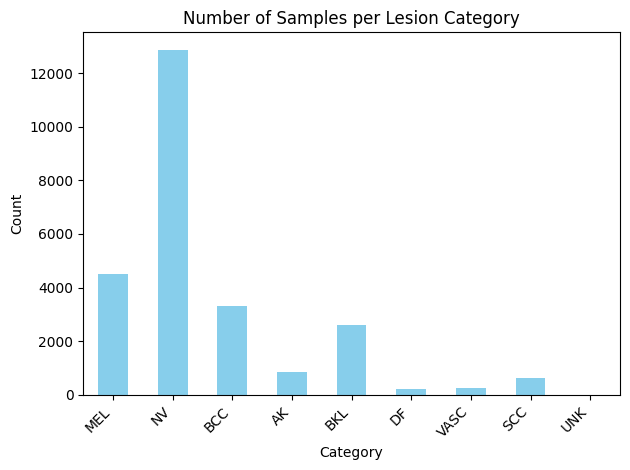

In [11]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import sum

# List of columns to sum (all except 'image')
lesion_columns = [col for col in df.columns if col != 'image']

# Calculate the sum for each lesion column
category_counts_df = df.agg(*[sum(c).alias(c) for c in lesion_columns])

# Convert the result to a pandas DataFrame for plotting
category_counts = category_counts_df.toPandas().transpose().squeeze()
category_counts.index.name = 'Category'
category_counts.name = 'Count'

# Plot the bar chart
category_counts.plot(kind="bar", color="skyblue")
plt.title("Number of Samples per Lesion Category")
plt.ylabel("Count")
plt.xlabel("Category")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#### 2.2.5 One-Hot

In [12]:
from pyspark.sql.functions import col, when, concat_ws
from pyspark.sql.functions import sum as _sum

# List of lesion columns
lesion_columns = ["MEL", "NV", "BCC", "AK", "BKL", "DF", "VASC", "SCC", "UNK"]

# Create a new column 'lesion_type' based on the one-hot encoded columns
# If multiple lesion types are marked as 1, list them separated by commas
df_with_lesion_type = df.withColumn(
    "lesion_type",
    concat_ws(
        ", ",
        *[when(col(c) == 1, c).otherwise(None) for c in lesion_columns]
    )
)

# Show the first few rows with the new column
print("DataFrame with 'lesion_type' column:")
df_with_lesion_type.select("image", "lesion_type", *lesion_columns).show(10, truncate=False)

# Analyze the distribution of the new 'lesion_type' column
print("\nDistribution of 'lesion_type':")

label_cols = df.columns[1:]
df_summary = df.select([_sum(c).alias(c) for c in label_cols])
df_summary.show()

DataFrame with 'lesion_type' column:
+------------+-----------+---+---+---+---+---+---+----+---+---+
|image       |lesion_type|MEL|NV |BCC|AK |BKL|DF |VASC|SCC|UNK|
+------------+-----------+---+---+---+---+---+---+----+---+---+
|ISIC_0000000|NV         |0  |1  |0  |0  |0  |0  |0   |0  |0  |
|ISIC_0000001|NV         |0  |1  |0  |0  |0  |0  |0   |0  |0  |
|ISIC_0000002|MEL        |1  |0  |0  |0  |0  |0  |0   |0  |0  |
|ISIC_0000003|NV         |0  |1  |0  |0  |0  |0  |0   |0  |0  |
|ISIC_0000004|MEL        |1  |0  |0  |0  |0  |0  |0   |0  |0  |
|ISIC_0000006|NV         |0  |1  |0  |0  |0  |0  |0   |0  |0  |
|ISIC_0000007|NV         |0  |1  |0  |0  |0  |0  |0   |0  |0  |
|ISIC_0000008|NV         |0  |1  |0  |0  |0  |0  |0   |0  |0  |
|ISIC_0000009|NV         |0  |1  |0  |0  |0  |0  |0   |0  |0  |
|ISIC_0000010|NV         |0  |1  |0  |0  |0  |0  |0   |0  |0  |
+------------+-----------+---+---+---+---+---+---+----+---+---+
only showing top 10 rows


Distribution of 'lesion_type':
+----+---

In [13]:
# Define the output path for the new CSV file
output_path = "/content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Data/ISIC_2019_Training_GroundTruth_1.csv"

# Save the DataFrame with the new 'lesion_type' column to a single CSV file
# using 'coalesce(1)' to write to a single partition, thus a single file
# 'header=True' to include the header row
# 'mode="overwrite"' to overwrite the file if it already exists
df_with_lesion_type.coalesce(1).write.csv(output_path, header=True, mode="overwrite")

print(f"DataFrame successfully saved to {output_path}")

DataFrame successfully saved to /content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Data/ISIC_2019_Training_GroundTruth_1.csv


In [14]:
df_with_lesion_type.groupBy("lesion_type").count().orderBy("count", ascending=False).show(truncate=False)

+-----------+-----+
|lesion_type|count|
+-----------+-----+
|NV         |12875|
|MEL        |4522 |
|BCC        |3323 |
|BKL        |2624 |
|AK         |867  |
|SCC        |628  |
|VASC       |253  |
|DF         |239  |
+-----------+-----+



### 2.3 Data Exploration

#### 2.3.1 Number of Samples per Lesion Category

/tmp/ipython-input-3064090277.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")


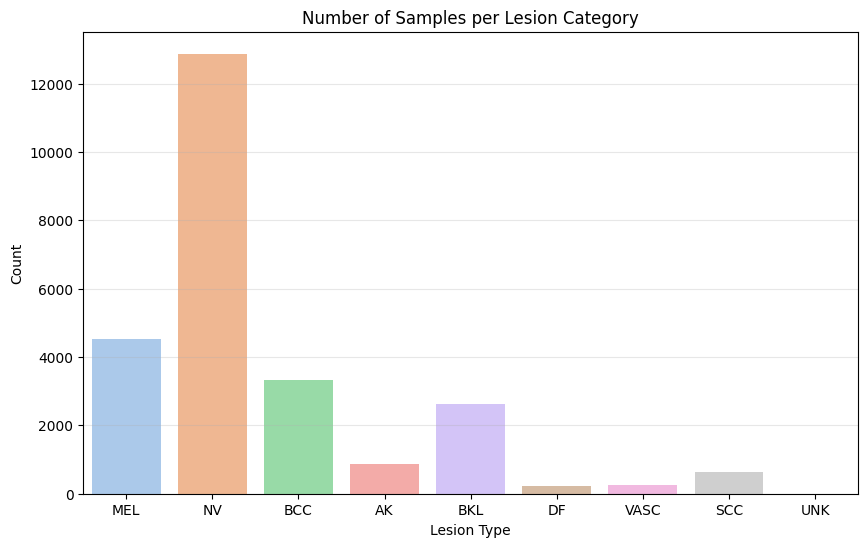

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame
pdf = df.toPandas()

# Sum the counts for each lesion type column
class_counts = pdf.iloc[:,1:].sum()

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")
plt.title("Number of Samples per Lesion Category")
plt.xlabel("Lesion Type"); plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.show()

#### 2.3.2 Proportion of lesion categories

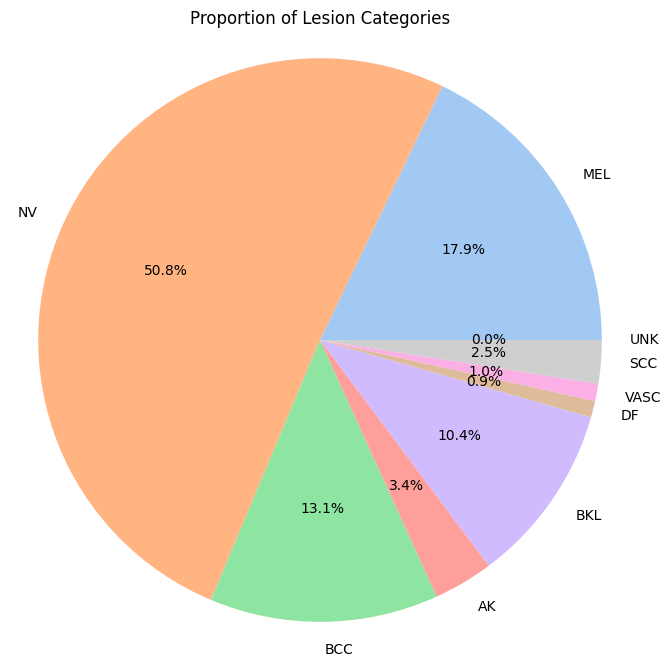

In [16]:
# Alternatively, plot the proportions as a pie chart
proportion = class_counts / class_counts.sum() * 100
plt.figure(figsize=(8,8))
plt.pie(proportion, labels=class_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette("pastel"))
plt.title("Proportion of Lesion Categories")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#### 2.3.3 Sorted distribution of lesion categories

Sorted Number of Samples per Lesion Category:
NV      12875
MEL      4522
BCC      3323
BKL      2624
AK        867
SCC       628
VASC      253
DF        239
UNK         0
dtype: int64


/tmp/ipython-input-2951040319.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_class_counts.index, y=sorted_class_counts.values, palette="pastel")


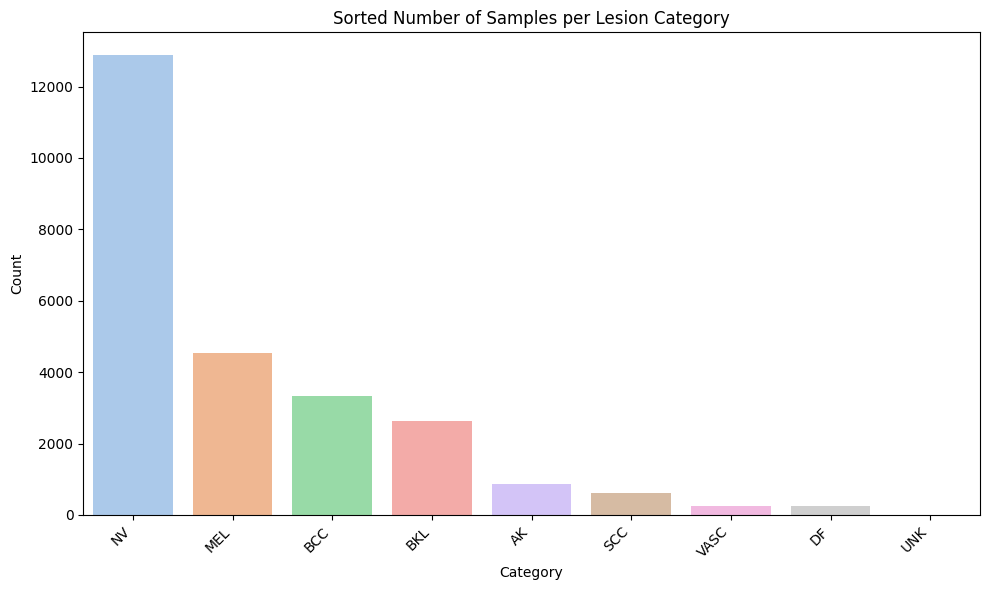

In [20]:
# Sort the class counts in descending order
sorted_class_counts = class_counts.sort_values(ascending=False)

# Display the sorted counts
print("Sorted Number of Samples per Lesion Category:")
print(sorted_class_counts)

# Plot the sorted counts as a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_class_counts.index, y=sorted_class_counts.values, palette="pastel")
plt.title("Sorted Number of Samples per Lesion Category")
plt.ylabel("Count")
plt.xlabel("Category")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#### 2.3.4 Cumulative distribution of lesion categories

In [21]:
# Ensure sorted_class_counts is available (run the cell above if needed)
# Calculate cumulative counts
cumulative_counts = sorted_class_counts.cumsum()

# Display cumulative counts
print("Cumulative Number of Samples per Lesion Category (Sorted):")
print(cumulative_counts)

Cumulative Number of Samples per Lesion Category (Sorted):
NV      12875
MEL     17397
BCC     20720
BKL     23344
AK      24211
SCC     24839
VASC    25092
DF      25331
UNK     25331
dtype: int64


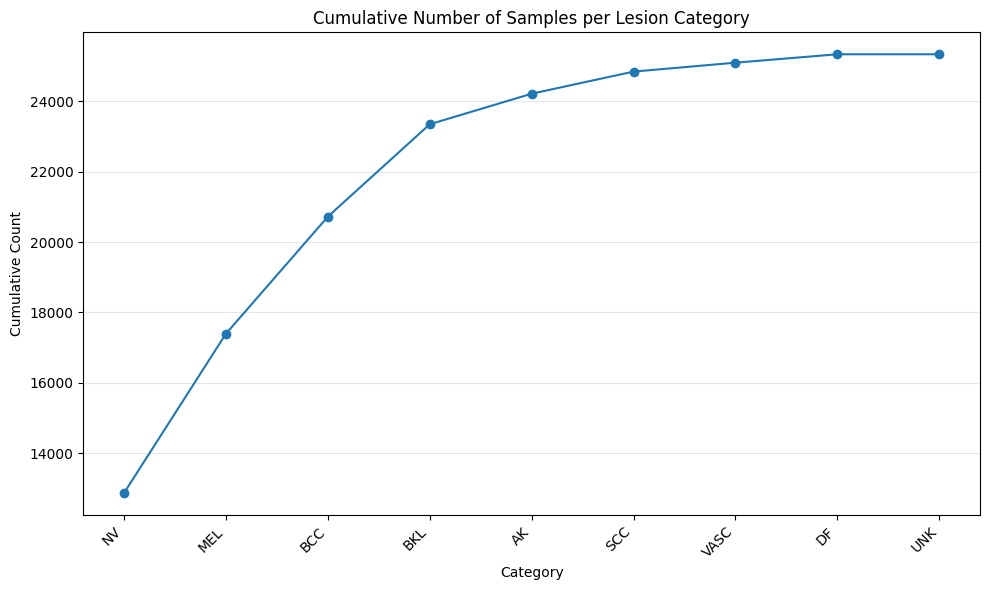

In [23]:
# Plot cumulative counts as a line chart
plt.figure(figsize=(10, 6))
cumulative_counts.plot(kind='line', marker='o')
plt.title("Cumulative Number of Samples per Lesion Category")
plt.ylabel("Cumulative Count")
plt.xlabel("Category")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### 2.3.5 Correlation heatmap of lesion categories

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Select only the lesion columns
lesion_df_spark = df.select(*["MEL", "NV", "BCC", "AK", "BKL", "DF", "VASC", "SCC", "UNK"])

# Convert to pandas DataFrame for correlation calculation and plotting
lesion_df_pandas = lesion_df_spark.toPandas()

# Calculate the correlation matrix
correlation_matrix = lesion_df_pandas.corr()

# Display the correlation matrix
print("Correlation Matrix of Lesion Categories:")
print(correlation_matrix)

Correlation Matrix of Lesion Categories:
           MEL        NV       BCC        AK       BKL        DF      VASC  \
MEL   1.000000 -0.473941 -0.181140 -0.087758 -0.158468 -0.045496 -0.046822   
NV   -0.473941  1.000000 -0.395056 -0.191395 -0.345610 -0.099224 -0.102117   
BCC  -0.181140 -0.395056  1.000000 -0.073151 -0.132092 -0.037923 -0.039029   
AK   -0.087758 -0.191395 -0.073151  1.000000 -0.063995 -0.018373 -0.018909   
BKL  -0.158468 -0.345610 -0.132092 -0.063995  1.000000 -0.033177 -0.034144   
DF   -0.045496 -0.099224 -0.037923 -0.018373 -0.033177  1.000000 -0.009803   
VASC -0.046822 -0.102117 -0.039029 -0.018909 -0.034144 -0.009803  1.000000   
SCC  -0.074327 -0.162102 -0.061955 -0.030016 -0.054201 -0.015561 -0.016015   
UNK        NaN       NaN       NaN       NaN       NaN       NaN       NaN   

           SCC  UNK  
MEL  -0.074327  NaN  
NV   -0.162102  NaN  
BCC  -0.061955  NaN  
AK   -0.030016  NaN  
BKL  -0.054201  NaN  
DF   -0.015561  NaN  
VASC -0.016015  NaN  
SC

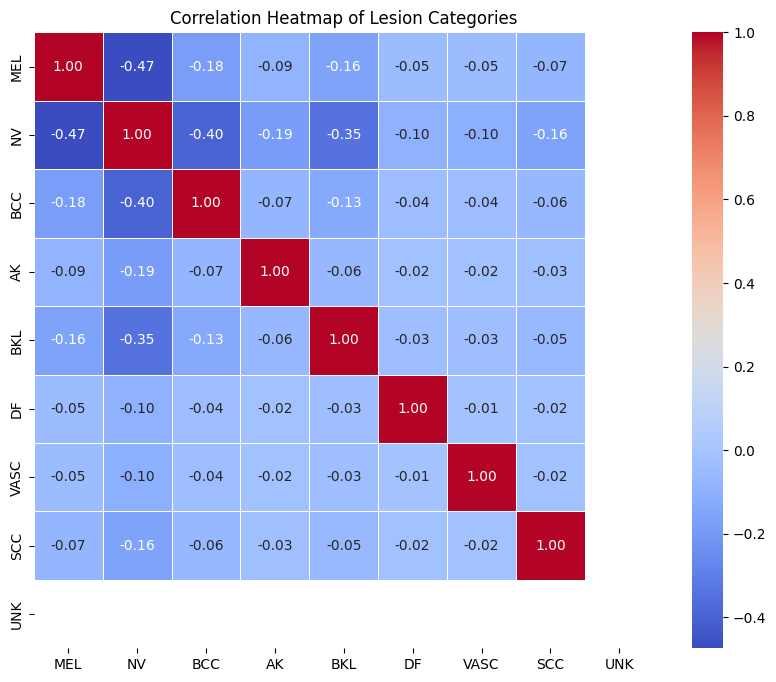

In [27]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Lesion Categories")
plt.show()

#### 2.3.6 Intuitive exploration of original images

In [29]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# --- Placeholder Code ---
# You will need to change this to the actual directory where your image files are stored.
# Make sure your image files are accessible in this Colab environment (e.g., in Google Drive).
image_directory = "/content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images" # Example path - CHANGE THIS


# Get a few image IDs from the DataFrame (e.g., first 5)
# Ensure 'df' DataFrame is available (run the data loading cells if needed)
image_ids_to_display = df.select("image").limit(5).collect()
image_filenames = [row.image + ".jpg" for row in image_ids_to_display] # Assuming images are JPG format


print(f"Attempting to display images from: {image_directory}")

# Display the images
plt.figure(figsize=(15, 5))
for i, filename in enumerate(image_filenames):
    image_path = os.path.join(image_directory, filename)
    try:
        img = Image.open(image_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"Error loading or displaying image {filename}: {e}")

plt.tight_layout()
plt.show()

Attempting to display images from: /content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images
Error: Image file not found at /content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images/ISIC_0000000.jpg
Error: Image file not found at /content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images/ISIC_0000001.jpg
Error: Image file not found at /content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images/ISIC_0000002.jpg
Error: Image file not found at /content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images/ISIC_0000003.jpg
Error: Image file not found at /content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images/ISIC_0000004.jpg


<Figure size 1500x500 with 0 Axes>

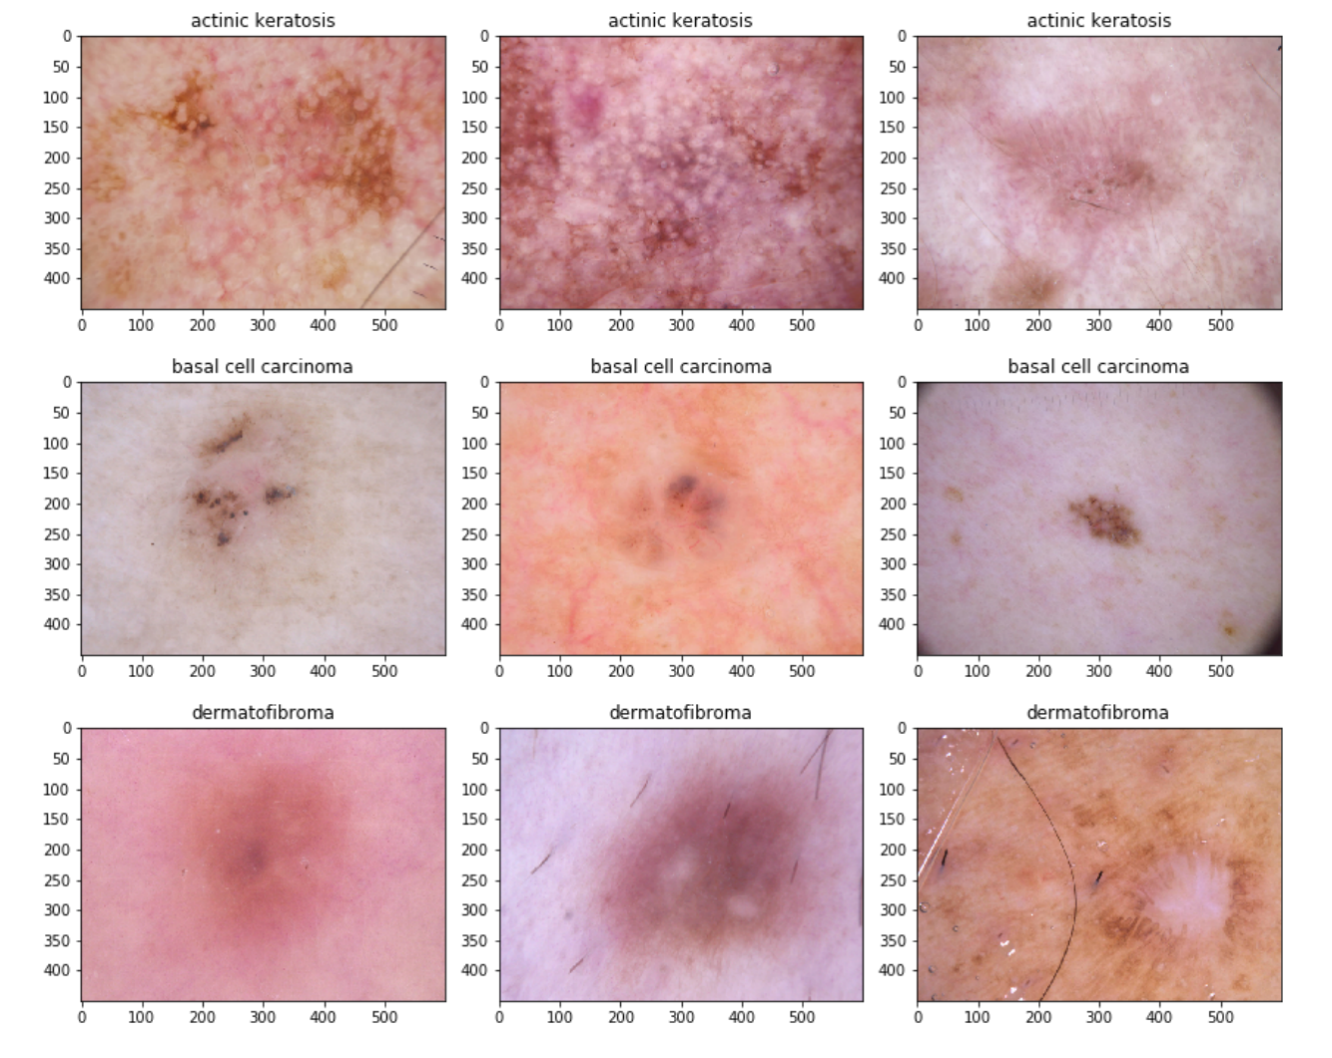

#### 2.3.7 Random sample visualization

In [31]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

# --- Placeholder Code ---
# You will need to change this to the actual directory where your image files are stored.
# Make sure your image files are accessible in this Colab environment (e.g., in Google Drive).
image_directory = "/content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images" # Example path - CHANGE THIS

# Get a list of all image IDs from the DataFrame
all_image_ids = [row.image for row in df.select("image").collect()]

# Randomly select a few image IDs (e.g., 5 random images)
num_images_to_display = 5
random_image_ids = random.sample(all_image_ids, min(num_images_to_display, len(all_image_ids)))
random_image_filenames = [image_id + ".jpg" for image_id in random_image_ids] # Assuming images are JPG format


print(f"Attempting to display random images from: {image_directory}")

# Display the images
plt.figure(figsize=(15, 5))
for i, filename in enumerate(random_image_filenames):
    image_path = os.path.join(image_directory, filename)
    try:
        img = Image.open(image_path)
        plt.subplot(1, num_images_to_display, i + 1)
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"Error loading or displaying image {filename}: {e}")

plt.tight_layout()
plt.show()

Attempting to display random images from: /content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images
Error: Image file not found at /content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images/ISIC_0028109.jpg
Error: Image file not found at /content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images/ISIC_0012903_downsampled.jpg
Error: Image file not found at /content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images/ISIC_0012159_downsampled.jpg
Error: Image file not found at /content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images/ISIC_0062431.jpg
Error: Image file not found at /content/drive/MyDrive/INFOSYS-722-Assignment-5-Iteration-4-BDAS/Images/ISIC_0000391_downsampled.jpg


<Figure size 1500x500 with 0 Axes>

### 2.4 Verifying Data Quality

#### 2.4.1 Checks for missing values and obvious errors

#### 2.4.2 Verification of one-hot encoding structure

#### 2.4.3 Data quality patterns relevant to modeling

#### 2.4.4 Extended checks and considerations

#### 2.4.5 Actions for the next step

## Step 3 Data Preparation

## Step 4 Data Transformation

## Step 5 Data Mining Method

## Step 6 Data Mining Algorithm

## Step 7 Data Mining

## Step 8 Interpretation